<a href="https://colab.research.google.com/github/shagun-dhaliwal/Practice-Repository-/blob/main/QM2_Project_Cleaning_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir data/TFR

import pandas as pd 
import pylab
import matplotlib.pyplot as plt


mkdir: cannot create directory ‘data/TFR’: No such file or directory


In [5]:
from google.colab import files
uploaded = files.upload()

Saving 2)TFR.csv to 2)TFR.csv
Saving 3) country code to region .csv to 3) country code to region .csv


# CLEANING TFR DATA

In [12]:
data_path = '/content/2)TFR.csv'
dataTFR = pd.read_csv(data_path, skiprows= 4, index_col=1, encoding='latin1')
dataTFR.head()


,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,2.908,2.788,2.691,2.613,2.552,2.506,2.472,2.446,2.425,2.408,2.392,2.377,2.364,2.353,2.342,2.332,2.320,2.307,2.291,2.272,2.249,2.221,2.187,2.149,2.108,2.064,2.021,1.978,1.939,1.903,1.872,1.846,1.823,1.803,1.787,1.774,1.765,1.760,1.759,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN,NaN,NaN
AFG,Afghanistan,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.449,7.449,7.449,7.449,7.449,7.450,7.452,7.455,7.458,7.460,7.461,7.461,7.461,7.466,7.479,7.502,7.535,7.572,7.606,7.629,7.632,7.610,7.561,7.485,7.387,7.272,7.148,7.016,6.875,6.722,6.555,6.373,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN,NaN,NaN
AGO,Angola,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,7.388,7.434,7.467,7.488,7.498,7.500,7.494,7.485,7.475,7.467,7.461,7.459,7.459,7.461,7.462,7.459,7.451,7.435,7.409,7.373,7.328,7.272,7.208,7.138,7.065,6.990,6.918,6.851,6.789,6.732,6.683,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN,NaN,NaN
ALB,Albania,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,5.057,4.910,4.775,4.642,4.509,4.373,4.235,4.099,3.966,3.841,3.725,3.621,3.530,3.452,3.383,3.323,3.269,3.217,3.164,3.108,3.046,2.978,2.905,2.829,2.751,2.672,2.591,2.507,2.422,2.334,2.246,2.157,2.068,1.981,1.897,1.821,1.755,1.704,1.671,1.654,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN,NaN,NaN
AND,Andorra,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataRegion = pd.read_csv('/content/3) country code to region .csv', index_col=0, encoding = 'latin1')
dataRegion.head()

,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
"ï»¿""Country Code""",,,,,
ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
AFG,South Asia,Low income,NaN,Afghanistan,NaN
AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [14]:
#Merge TFR data with data that categorizes country according to region. 
datamerged = dataTFR.merge(dataRegion, left_index=True, right_index=True)
datamerged.head()

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
ABW,Aruba,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,2.908,2.788,2.691,2.613,2.552,2.506,2.472,2.446,2.425,2.408,2.392,2.377,2.364,2.353,2.342,2.332,2.320,2.307,2.291,2.272,2.249,2.221,2.187,2.149,2.108,2.064,2.021,1.978,1.939,1.903,1.872,1.846,1.823,1.803,1.787,1.774,1.765,1.760,1.759,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN,NaN,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
AFG,Afghanistan,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.449,7.449,7.449,7.449,7.449,7.450,7.452,7.455,7.458,7.460,7.461,7.461,7.461,7.466,7.479,7.502,7.535,7.572,7.606,7.629,7.632,7.610,7.561,7.485,7.387,7.272,7.148,7.016,6.875,6.722,6.555,6.373,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN,NaN,NaN,South Asia,Low income,NaN,Afghanistan,NaN
AGO,Angola,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,7.388,7.434,7.467,7.488,7.498,7.500,7.494,7.485,7.475,7.467,7.461,7.459,7.459,7.461,7.462,7.459,7.451,7.435,7.409,7.373,7.328,7.272,7.208,7.138,7.065,6.990,6.918,6.851,6.789,6.732,6.683,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
ALB,Albania,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,5.057,4.910,4.775,4.642,4.509,4.373,4.235,4.099,3.966,3.841,3.725,3.621,3.530,3.452,3.383,3.323,3.269,3.217,3.164,3.108,3.046,2.978,2.905,2.829,2.751,2.672,2.591,2.507,2.422,2.334,2.246,2.157,2.068,1.981,1.897,1.821,1.755,1.704,1.671,1.654,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN,NaN,NaN,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
AND,Andorra,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income,NaN,Andorra,NaN


In [15]:
datamerged.drop(["Indicator Code", "Unnamed: 65", "SpecialNotes","TableName","Unnamed: 5"], axis='columns', inplace=True)
datamerged.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
ABW,Aruba,"Fertility rate, total (births per woman)",4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,2.908,2.788,2.691,2.613,2.552,2.506,2.472,2.446,2.425,2.408,2.392,2.377,2.364,2.353,2.342,2.332,2.320,2.307,2.291,2.272,2.249,2.221,2.187,2.149,2.108,2.064,2.021,1.978,1.939,1.903,1.872,1.846,1.823,1.803,1.787,1.774,1.765,1.760,1.759,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN,NaN,Latin America & Caribbean,High income
AFG,Afghanistan,"Fertility rate, total (births per woman)",7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.449,7.449,7.449,7.449,7.449,7.450,7.452,7.455,7.458,7.460,7.461,7.461,7.461,7.466,7.479,7.502,7.535,7.572,7.606,7.629,7.632,7.610,7.561,7.485,7.387,7.272,7.148,7.016,6.875,6.722,6.555,6.373,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN,NaN,South Asia,Low income
AGO,Angola,"Fertility rate, total (births per woman)",6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,7.388,7.434,7.467,7.488,7.498,7.500,7.494,7.485,7.475,7.467,7.461,7.459,7.459,7.461,7.462,7.459,7.451,7.435,7.409,7.373,7.328,7.272,7.208,7.138,7.065,6.990,6.918,6.851,6.789,6.732,6.683,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN,NaN,Sub-Saharan Africa,Lower middle income
ALB,Albania,"Fertility rate, total (births per woman)",6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,5.057,4.910,4.775,4.642,4.509,4.373,4.235,4.099,3.966,3.841,3.725,3.621,3.530,3.452,3.383,3.323,3.269,3.217,3.164,3.108,3.046,2.978,2.905,2.829,2.751,2.672,2.591,2.507,2.422,2.334,2.246,2.157,2.068,1.981,1.897,1.821,1.755,1.704,1.671,1.654,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN,NaN,Europe & Central Asia,Upper middle income
AND,Andorra,"Fertility rate, total (births per woman)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [16]:
#Download cleaned data set for further analysis
datamerged.to_csv('TFR_cleaned.csv') 


So far we've merged and cleaned the TFR Data. Here onwards we will cleanse and merge the remaining 3 datasets (education, LFPR and HDI)

In [17]:
#Upload remaining 3 datasets
from google.colab import files
uploaded = files.upload()

Saving 2. Female Education.csv to 2. Female Education.csv
Saving 3. HDI.csv to 3. HDI.csv
Saving 4. Female LFPR.csv to 4. Female LFPR.csv


# CLEANING HDI 

In [18]:
dataHDI=pd.read_csv('/content/3. HDI.csv', skiprows =1, index_col=1, encoding = 'latin1')
#drops all unnamed columns, because for some reasons data has empty columns every other column 
dataHDI = dataHDI.loc[:, ~dataHDI.columns.str.contains('^Unnamed')] #source : https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
dataHDI.head()

,HDI Rank (2018),1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,170,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
Albania,69,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
Algeria,82,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,0.646,0.655,0.666,0.676,0.685,0.694,0.699,0.708,0.711,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
Andorra,36,..,..,..,..,..,..,..,..,..,..,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
Angola,149,..,..,..,..,..,..,..,..,..,0.384,0.394,0.404,0.419,0.428,0.440,0.453,0.466,0.482,0.494,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [19]:
#Removing junk data at bottom of table, need to drop last 18 rows
dataHDI.drop(dataHDI.tail(18).index,inplace=True)
dataHDI.tail()

,HDI Rank (2018),1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Venezuela (Bolivarian Republic of),96,0.638,0.648,0.654,0.656,0.657,0.660,0.662,0.666,0.668,0.670,0.672,0.680,0.688,0.687,0.700,0.714,0.727,0.743,0.753,0.752,0.753,0.764,0.767,0.772,0.770,0.763,0.752,0.735,0.726
Viet Nam,118,0.475,0.484,0.496,0.506,0.517,0.529,0.540,0.539,0.559,0.566,0.578,0.586,0.594,0.603,0.612,0.616,0.624,0.632,0.639,0.650,0.653,0.663,0.668,0.673,0.675,0.680,0.685,0.690,0.693
Yemen,177,0.392,0.396,0.395,0.398,0.398,0.393,0.408,0.418,0.430,0.423,0.432,0.449,0.456,0.464,0.471,0.472,0.478,0.486,0.488,0.503,0.499,0.511,0.501,0.506,0.504,0.493,0.477,0.463,0.463
Zambia,143,0.424,0.421,0.420,0.422,0.418,0.419,0.419,0.420,0.419,0.424,0.428,0.436,0.445,0.455,0.464,0.475,0.486,0.492,0.507,0.521,0.531,0.541,0.552,0.559,0.565,0.570,0.580,0.589,0.591
Zimbabwe,150,0.498,0.500,0.485,0.480,0.478,0.472,0.471,0.466,0.461,0.457,0.452,0.453,0.444,0.430,0.427,0.425,0.429,0.434,0.432,0.448,0.472,0.490,0.516,0.527,0.537,0.544,0.549,0.553,0.563


In [20]:
dataHDI.to_csv('HDI_cleaned.csv') 


# CLEANING FEMALE EDUCATION  

In [21]:
datapath = '/content/2. Female Education.csv'
dataed = pd.read_csv(datapath, encoding='latin1') 
dataed.drop(['Age group', 'Units of measurement', 'Sex'], axis = 1, inplace=True)
dataed.rename(columns={'Reference Area':'Country'}, inplace=True)
dataed.rename(columns={'Time Period':'Year'}, inplace=True)
dataed.rename(columns={'Observation Value':'Females in secondary education (%)'}, inplace=True)
dataed.head()


,Country,Year,Females in secondary education (%)
0,Afghanistan,2014,34.62152
1,Afghanistan,2013,34.43871
2,Afghanistan,2012,34.63026
3,Afghanistan,2011,34.45594
4,Afghanistan,2010,32.00865


In [24]:
#Sets 2 columns as index 
dataed.set_index(['Country', 'Year'])

Females in secondary education (%)
Country     Year                                    
Afghanistan 2014                            34.62152
            2013                            34.43871
            2012                            34.63026
            2011                            34.45594
            2010                            32.00865
...                                              ...
Zimbabwe    1979                            45.30896
            1978                            43.32329
            1977                            42.61502
            1976                            41.88793
            1975                            41.49989

[4977 rows x 1 columns]

In [23]:
dataed.to_csv('Female_education_cleaned.csv') 


# CLEANING FEMALE LFPR 

In [25]:
datalf = pd.read_csv('/content/4. Female LFPR.csv', encoding = 'latin1')
datalf.to_csv('Female_LFPR_cleaned.csv') 
datalf.rename(columns={'Entity':'Country'}, inplace=True)
datalf.head()


,Country,Code,Year,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,14.785
1,Afghanistan,AFG,1991,14.851
2,Afghanistan,AFG,1992,14.909
3,Afghanistan,AFG,1993,14.917
4,Afghanistan,AFG,1994,14.912


In [26]:
datalf.set_index(['Country', 'Year'])

Code  Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)
Country     Year                                                                                                      
Afghanistan 1990  AFG                                          14.785000                                              
            1991  AFG                                          14.851000                                              
            1992  AFG                                          14.909000                                              
            1993  AFG                                          14.917000                                              
            1994  AFG                                          14.912000                                              
...               ...                                                ...                                              
Zimbabwe    2013  ZWE                                          77.862999                                              
            2014  ZWE                                          78.010002                                              
            2015  ZWE                                          78.113998                                              
            2016  ZWE                                          78.209000                                              
            2017  ZWE                                          78.542000                                              

[6524 rows x 2 columns]

In [27]:
datalf.to_csv('Female_LFPR_cleaned.csv') 

# Merge TFR and HDI (*still need to do!*)

In [37]:
datamerged.head()


,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
ABW,Aruba,"Fertility rate, total (births per woman)",4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,2.908,2.788,2.691,2.613,2.552,2.506,2.472,2.446,2.425,2.408,2.392,2.377,2.364,2.353,2.342,2.332,2.320,2.307,2.291,2.272,2.249,2.221,2.187,2.149,2.108,2.064,2.021,1.978,1.939,1.903,1.872,1.846,1.823,1.803,1.787,1.774,1.765,1.760,1.759,1.761,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,1.896,NaN,NaN,Latin America & Caribbean,High income
AFG,Afghanistan,"Fertility rate, total (births per woman)",7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.449,7.449,7.449,7.449,7.449,7.450,7.452,7.455,7.458,7.460,7.461,7.461,7.461,7.466,7.479,7.502,7.535,7.572,7.606,7.629,7.632,7.610,7.561,7.485,7.387,7.272,7.148,7.016,6.875,6.722,6.555,6.373,6.180,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,4.473,NaN,NaN,South Asia,Low income
AGO,Angola,"Fertility rate, total (births per woman)",6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,7.388,7.434,7.467,7.488,7.498,7.500,7.494,7.485,7.475,7.467,7.461,7.459,7.459,7.461,7.462,7.459,7.451,7.435,7.409,7.373,7.328,7.272,7.208,7.138,7.065,6.990,6.918,6.851,6.789,6.732,6.683,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,5.519,NaN,NaN,Sub-Saharan Africa,Lower middle income
ALB,Albania,"Fertility rate, total (births per woman)",6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,5.057,4.910,4.775,4.642,4.509,4.373,4.235,4.099,3.966,3.841,3.725,3.621,3.530,3.452,3.383,3.323,3.269,3.217,3.164,3.108,3.046,2.978,2.905,2.829,2.751,2.672,2.591,2.507,2.422,2.334,2.246,2.157,2.068,1.981,1.897,1.821,1.755,1.704,1.671,1.654,1.652,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,1.617,NaN,NaN,Europe & Central Asia,Upper middle income
AND,Andorra,"Fertility rate, total (births per woman)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [38]:
dataHDI.head()

,HDI Rank (2018),1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,170,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,0.345,0.347,0.378,0.387,0.400,0.410,0.419,0.431,0.436,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
Albania,69,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,0.667,0.673,0.680,0.687,0.692,0.702,0.709,0.718,0.724,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
Algeria,82,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,0.646,0.655,0.666,0.676,0.685,0.694,0.699,0.708,0.711,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
Andorra,36,..,..,..,..,..,..,..,..,..,..,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
Angola,149,..,..,..,..,..,..,..,..,..,0.384,0.394,0.404,0.419,0.428,0.440,0.453,0.466,0.482,0.494,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


#Merge LFPR and Education

In [41]:
#Merge data on double index
#Inner join merges only stuff in common in both datasets (think this is the one we want!)
#Outer join merges everything, leaves missing values blank
data_LFPR_Ed = dataed.merge(datalf, left_on =(['Country', 'Year']), right_on=(['Country', 'Year']), how='outer')

data_LFPR_Ed
data_LFPR_Ed.to_csv('LFPR_Education_merged.csv') 

# PLAYING WITH TFR VISUALISATION

The code above has allowed us to clean the TFR data set and merge it with another data set that provided the region of each country as corresponding by the index of country code. 

In [ ]:
#Now, we will attempt to plot scatterplot/histogram/boxplot of TFRs of ALL countries in 2018 

Text(0.5, 1.0, ' Total Fertilty Rate (2018) by Country')

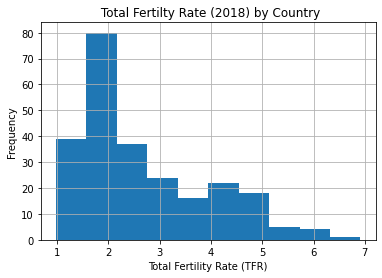

In [ ]:
datamerged['2018'].hist(bins=10)
plt.xlabel('Total Fertility Rate (TFR)')
plt.ylabel('Frequency')
plt.title(' Total Fertilty Rate (2018) by Country')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, ' Total Fertilty Rate (2018) by Country')

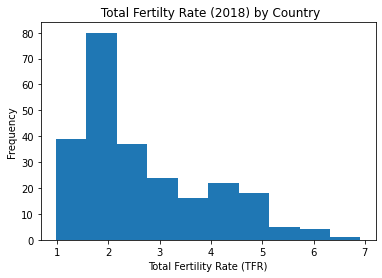

In [ ]:
plt.hist(datamerged['2018'])
plt.xlabel('Total Fertility Rate (TFR)')
plt.ylabel('Frequency')
plt.title(' Total Fertilty Rate (2018) by Country')

In [ ]:
import seaborn as sns


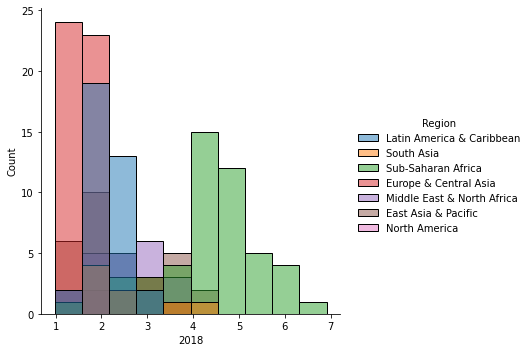

In [ ]:
sns.displot(datamerged, x="2018",hue = "Region")